In [56]:
import numpy as np
import pandas as pd
import math
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('../data-101/offenses_new_york_city_2013.csv')

In [58]:
df.columns = ['City', 'Population', 'Violent_crime', 'Murder', 'Rape', 'Rape2', 'Robbery', 'Agg_assault', 
              'Property_crime', 'Burglary', 'Larceny_theft', 'MV_theft', 'Arson3']

In [59]:
df.head()

,City,Population,Violent_crime,Murder,Rape,Rape2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,MV_theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [60]:
# cleanup data
# remove the outline data by Population < 900,000
x = pd.DataFrame()
y = pd.DataFrame()
x['Population'] = df[df.Population < 900000]['Population']
x['Population2'] = [x*x for x in x['Population'].tolist()]
x['Murder'] = df[df.Population < 900000]['Murder'].apply(lambda x: 1 if x > 0 else 0)
x['Robbery'] = df[df.Population < 900000]['Robbery'].apply(lambda x: 1 if x > 0 else 0)
y['Property_crime'] = df[df.Population < 900000]['Property_crime']

In [61]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
print('The fitted coefficiency = {}'.format(model.coef_))
print('The fitted intercept = {}'.format(model.intercept_))
print(model.score(x, y))

The fitted coefficiency = [[1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]]
The fitted intercept = [-16.81586632]
0.8444937611173492


In [63]:
pred_y = model.predict(x)

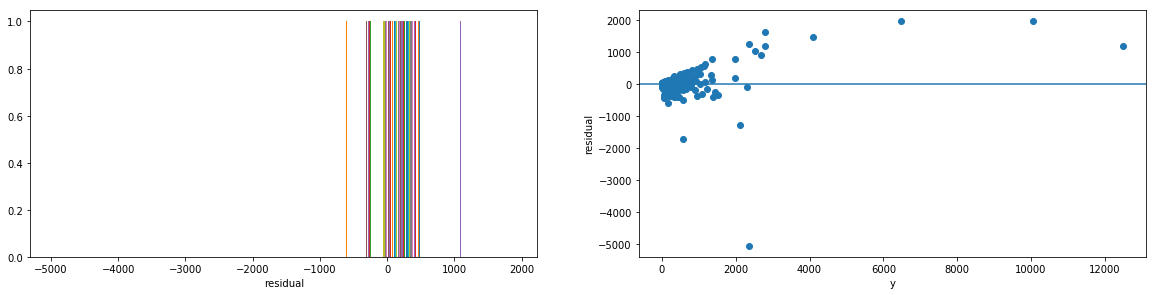

In [64]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.hist((y - pred_y))
plt.xlabel('residual')

plt.subplot(2,2,2)
plt.scatter(y, (y - pred_y))
plt.xlabel('y')
plt.ylabel('residual')
plt.axhline(y=0)
plt.show()

## from right plot, it looks a little concerning. The residual is consistently positive 
##       for y > 2000

##  multicollinearity
##           In this case, two features, Population & Population2 are strongly collerated.

In [81]:
del model1

##   To make it better,

In [82]:
X1 = pd.DataFrame()
Y1 = pd.DataFrame()
X1['Population'] = df[df.Population < 900000]['Population']
X1['Population2'] = [x*x for x in X1['Population'].tolist()]
X1['Burglary'] = df[df.Population < 900000]['Burglary']
X1['Murder'] = df[df.Population < 900000]['Murder'].apply(lambda x: 1 if x > 0 else 0)
X1['Robbery'] = df[df.Population < 900000]['Robbery'].apply(lambda x: 1 if x > 0 else 0)
Y1['Property_crime'] = df[df.Population < 900000]['Property_crime']

In [83]:
model1 = linear_model.LinearRegression()
model1.fit(X1, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
print('The fitted coefficiency = {}'.format(model1.coef_))
print('The fitted intercept = {}'.format(model1.intercept_))
print(model1.score(X1, Y1))

The fitted coefficiency = [[ 1.30429266e-02 -3.22761121e-08  3.28658535e+00 -4.67033620e+01
   2.51963036e+01]]
The fitted intercept = [-36.39590031]
0.9800947590555718


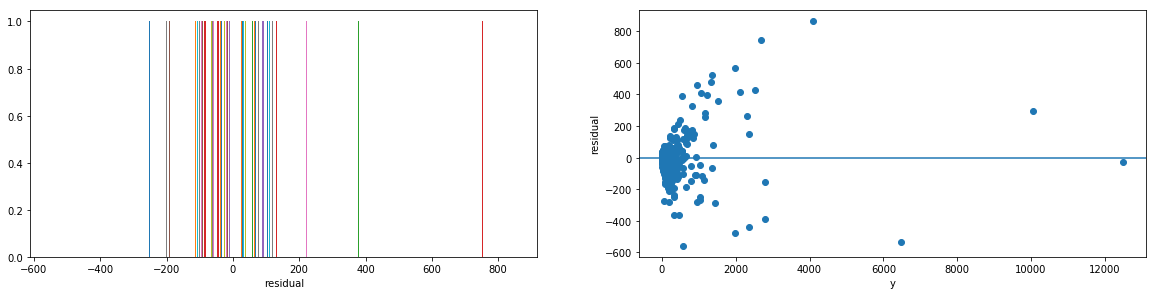

In [85]:
pred_Y = model1.predict(X1)
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.hist((Y1 - pred_Y))
plt.xlabel('residual')

plt.subplot(2,2,2)
plt.scatter(Y1, (Y1 - pred_Y))
plt.xlabel('y')
plt.ylabel('residual')
plt.axhline(y=0)
plt.show()

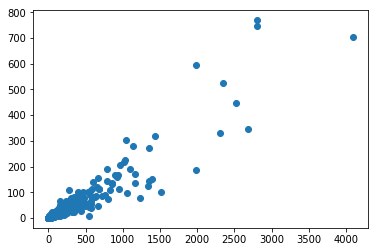

In [80]:
plt.scatter(df[df['Population']<100000]['Property_crime'], df[df['Population']<100000]['Burglary'])
plt.show()